# Import Relevant Libraries

In [1]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import datetime
from datetime import timezone
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from math import pi
import time 
import pickle

from nintendo.trend_radar_functions import (
    reset_index, 
    json_to_df, 
    combine_2_dfs,
    add_time_to_df,
    unique_seconds_list, 
    second_groupings, 
    seconds_dict, 
    unique_words_list,
    vectorize_to_df,
    words_df,
    trend_line,
    trend_line_19,
    drop_time_from_df,
    create_dictionary_for_specified_time,
    create_dictionary_for_specified_time_19,
    top_5_dict_to_df,
    top_5_dict_to_df_19,
    radar_plot_creator,
    radar_plot_creator_19,
    completed_words_df,
    trend_function,
    radar_function,
    automating_radar_plots,
    two_series_to_dict,
    specific_time_slots,
    create_timestamp_col,
    add_time_from_created,
    create_time_col_19,
    select_relevant_cols, 
    select_relevant_cols_19,
    filter_lang,
    filter_lang_19,
    drop_duplicates,
    unique_hashtag_list,
    unique_link_list,
    unique_ats_list,
    remove_hash_link_at,
    strip_punctuation,
    remove_punctuation,
    make_lower_case,
    get_wordnet_pos,
    lemmatize_text,
    remove_stop_words,
    remove_just_hash,
    vader_sentiment,
    trend_line_for_web,
    radar_plot_creator_for_web,
    automating_radar_plots_for_web,
   )        

from nintendo.nintendo_functions_2 import (   #for api use
    fetch_from_cache_or_api, 
    get_token, 
    get_tweets, 
    store_many_tweets, 
    store_response_tweets, 
    tweet_coll)

'trend_line_output.png'

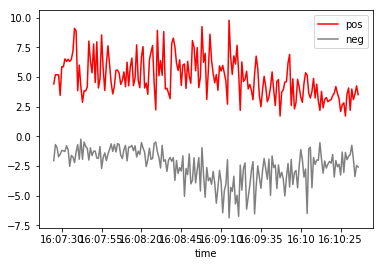

In [2]:
trend_line_for_web(start_time_str='16:07:24', 
                  end_time_str='16:10:36',
                  sum_mean='sum')

.

.

# Master Functions at Bottom of Notebook

.

.

# Load Cleaned DataFrame     
Cleaned = no hashtages, web links, @s... no punctuation, lowercase, lemmatized and no stop words

In [3]:
import pickle

with open('cleaned_twitter_df2.pkl', 'rb') as f:
    df = pickle.load(f)

# Load Vader Output

In [4]:
import pickle

with open('vader_output.pkl', 'rb') as f:
    vader_output = pickle.load(f)

Append vader outputs to original dataframe   
* Reset index of original df
* Turned vader sentiments json into df

In [5]:
df = combine_2_dfs(reset_index(df),json_to_df(vader_output))

Create new .time. column showing hours, minutes, seconds

In [6]:
df = add_time_to_df(df)

In [7]:
create_time_col_19(df)

# Trend Lines

List of every unique second in the data

In [8]:
unique_sec_list = unique_seconds_list(df)

Append second grouping dictionaries to the dataframe in new columns

In [ ]:
all_relevant_seconds_for_grouping = [5,15,30,60,120,180,300,600,900,
                                     1200,1800,2400,3000,3600]

for i in all_relevant_seconds_for_grouping:
    df[str(i)+'_seconds'] = df['.time.'].map(seconds_dict(i, unique_sec_list))

Create SUM Trend Lines (5 second intervals)

In [ ]:
trend_line(df, 5, 'sum')

Create MEAN Trend Lines (5 second intervals)

In [ ]:
trend_line(df, 5, 'mean')

# Words DataFrame

In [9]:
words_df_fixed = words_df(df)

There are duplicate .time. columns, remove and replace

In [10]:
words_df_fixed = drop_time_from_df(words_df_fixed)
words_df_fixed = add_time_to_df(words_df_fixed)

# Radar Plots

imputs: df, time=which X min slot, seconds=length of time, which_five='top' or 'bottom'

In [ ]:
radar_plot_creator(words_df_fixed, time=30, seconds=30, which_five='top')
#words_df, 'top' 5 or 'bottom' 5, second grouping type in seconds

In [ ]:
radar_plot_creator(words_df_fixed, time=30, seconds=30, which_five='bottom')

Identify time lag... mario party started at 6:00... became somewhat obvious at 6:40

# Time Specific 2018

### Trend Lines

In [ ]:
# def trend_line_for_web(
#                   start_time_str='16:07:24', 
#                   end_time_str='16:10:36',
#                   sum_mean='sum'
#                  ):
#     # load cleaned df
#     with open('cleaned_twitter_df2.pkl', 'rb') as f:
#         df = pickle.load(f)
#     # load vader sentiments df
#     with open('vader_output.pkl', 'rb') as f:
#         vader_output = pickle.load(f)
#     df = combine_2_dfs(reset_index(df),json_to_df(vader_output))   
#     df = add_time_to_df(df)
#     create_time_col_19(df)
#     unique_sec_list = unique_seconds_list(df)
    
#     '''Returns a trend line using start and end times'''
#     criteria = specific_time_slots(df, 
#                                     start_time_str=start_time_str,
#                                     end_time_str=end_time_str,
#                                     full_or_filtered_list='filtered')
#     if 'temp_criteria_col' not in df.columns:
#         pass
#     else:
#         df.drop(['temp_criteria_col'], axis=1)
#     df['temp_criteria_col'] = df['index'].map(criteria)
#     df['temp_criteria_col'].fillna(0, inplace=True)
#     if sum_mean == 'sum':
#         temp_df = df.loc[df['temp_criteria_col'] == 1]
#         temp_df = temp_df.groupby('datetime').sum()
#         #temp_df = df1.groupby('temp_criteria_col').sum()
#         #temp_df = temp_df.reset_index()
#     elif sum_mean == 'mean':
#         temp_df = df.loc[df['temp_criteria_col'] == 1]
#         temp_df = temp_df.groupby('datetime').mean()
#         #temp_df = df1.groupby('temp_criteria_col').mean()
#         #temp_df = temp_df.reset_index()      
#     #plt.plot(temp_df['temp_criteria_col'], temp_df['pos'], color='red')
#     #plt.plot(temp_df['temp_criteria_col'], temp_df['neg'], color='grey')
#     fig,ax = plt.subplots()
#     ax.plot(temp_df['pos'], color='red')
#     ax.plot(temp_df['neg'], color='grey')
#     #ax.xlabel('Seconds')
#     #ax.ylabel('Sentiment')
#     #ax.title('Nintendo E3 Twitter Sentiments (sum)')
#     ax.legend()
#     return fig.savefig('nintendo/webapp/templates/trend_line_output.png')

In [ ]:
trend_line_19(df, 
                start_time_str='16:07:24', 
                end_time_str='16:10:36',
                sum_mean='sum'
                )

### Radar Plots

In [13]:
start_time = '16:19:24'
end_time = '16:20:36'

In [ ]:
automating_radar_plots_for_web(df, start_time, end_time, which_five='top')

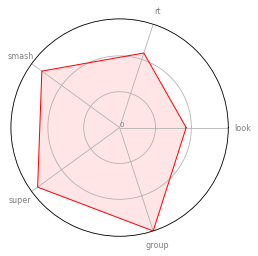

In [17]:
automating_radar_plots(df, 
                       start_time=start_time, 
                       end_time=end_time, 
                       which_five='top')

In [14]:
def radar_plot_creator_for_web(df, time=1, seconds=5, which_five='top'):
   # Set data
    radar_df_test = top_5_dict_to_df_19(df,
                                     #time=time, 
                                     #seconds=seconds, 
                                     which_five=which_five)
    # Make negative values positive
    if which_five=='bottom':
        radar_df_test = radar_df_test.apply(lambda x: x * -1)
    else:
        pass
    # Find largest score, will affect radar plot size
    dictionary = create_dictionary_for_specified_time_19(df, 
                                                         #time=time, 
                                                         #seconds=seconds, 
                                                         which_five=which_five)
    list_of_scores = []
    for k, v in dictionary.items():
        list_of_scores.append(v)
    if which_five=='top':
        relevant_score = max(list_of_scores)
        #relevant_score = relevant_score + (relevant_score*.05)
    elif which_five=='bottom':
        relevant_score = (min(list_of_scores))*-1
        #relevant_score = relevant_score - (.5) 
    # number of variable
    categories=list(radar_df_test)[1:]
    N = len(categories)
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=radar_df_test.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    #fig,ax = plt.subplots(111, polar=True)
    #ax = plt.subplot(111, polar=True)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,(relevant_score*.33),(relevant_score*.66),(relevant_score)], 
               [0, "", "", ""], color="grey", size=7)
    plt.ylim(0,(relevant_score))
    # Plot data
    if which_five == 'top':
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='red')
    elif which_five == 'bottom':
        ax.plot(angles, values, linewidth=1, linestyle='solid', color='grey')
    # Fill area
    if which_five == 'top':
        radar = ax.fill(angles, values, 'red', alpha=0.1);  
    elif which_five == 'bottom':
        radar = ax.fill(angles, values, 'grey', alpha=0.1);    
    return radar.savefig('radar_output.png')


In [15]:
def automating_radar_plots_for_web(df1, start_time=start_time, end_time=end_time, which_five='top'):
    criteria = specific_time_slots(df1, 
                                    start_time_str=start_time,
                                    end_time_str=end_time,
                                    full_or_filtered_list='filtered')
    if 'temp_criteria_col' not in df1.columns:
        pass
    else:
        df1.drop(['temp_criteria_col'], axis=1)
    #df = df1.drop(['temp_criteria_col'], axis=1)
    df1['temp_criteria_col'] = df1['index'].map(criteria)
    df1['temp_criteria_col'].fillna(0, inplace=True)
    word_df=words_df_fixed   # words_df(df1)
    return radar_plot_creator_for_web(word_df, 
                          #time=30, 
                          #seconds=30, 
                          which_five=which_five)

In [16]:
automating_radar_plots_for_web(df)

KeyError: 'temp_criteria_col'

In [ ]:
#df.loc[df['time'] == '16:07:00']

# Master Functions

In [ ]:
trend_function(time=30, seconds=5, sum_mean='sum', which_five='top', trend_radar='trend')

In [ ]:
radar_function(time=30, seconds=5, sum_mean='sum', which_five='top', trend_radar='trend')